In [39]:
from google.colab import files
files.upload()

Saving sign-language-mnist.zip to sign-language-mnist.zip


In [45]:
!unzip sign-language-mnist.zip


Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_train.csv    


In [46]:
!ls


 american_sign_language.PNG   sign_mnist_test.csv
 amer_sign2.png		      sign_mnist_train.csv
 amer_sign3.png		      WIN_20190217_21_51_26_Pro.jpg
 drive			     'WIN_20190217_22_18_09_Pro (3).jpg'
 sample_data		     'WIN_20190217_22_21_43_Pro (2).jpg'
 sign-language-mnist.zip


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator


In [51]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [52]:
train.shape


(27455, 785)

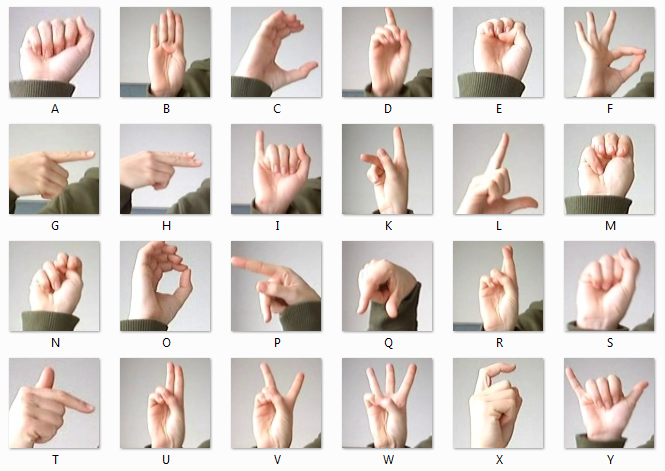

In [53]:
Image.open("amer_sign2.png")


In [54]:
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


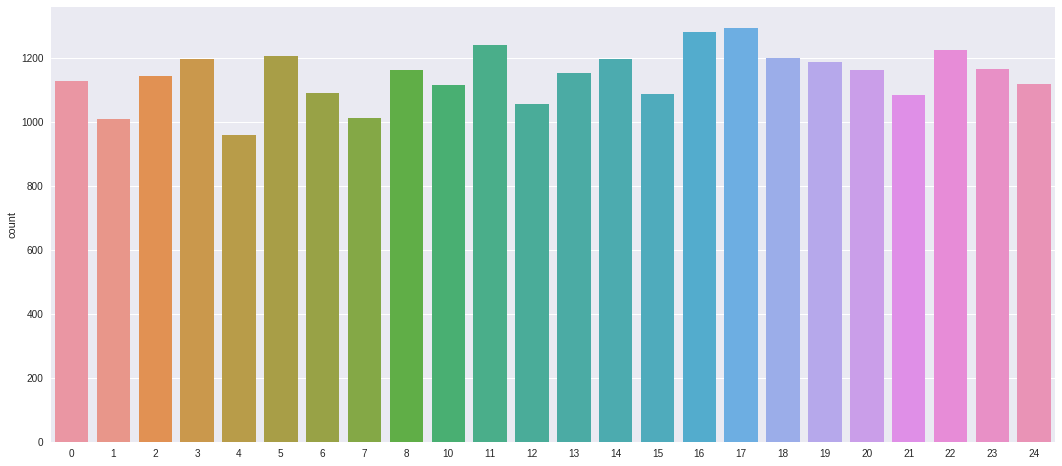

In [55]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [57]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [49]:
labels[0]

NameError: ignored

Text(0.5, 0.98, 'Grayscale images')

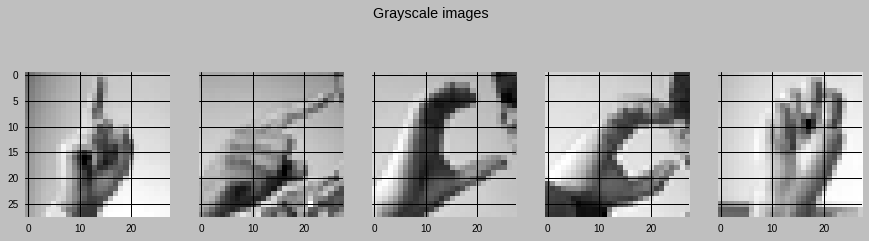

In [16]:
images = train.values
plt.style.use('grayscale')
fig, axs = plt.subplots(1, 5, figsize=(15, 4), sharey=True)
for i in range(5): 
        axs[i].imshow(images[i].reshape(28,28))
fig.suptitle('Grayscale images')

In [0]:
images =  images/255.
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, stratify = labels, random_state = 7)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
num_classes = 24
batch_size = 125
epochs = 50


In [20]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(4,4), activation = 'relu', input_shape=(28, 28 ,1), padding='same' ))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (4, 4), activation = 'relu', padding='same' ))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = keras.losses.categorical_crossentropy, optimizer='nadam',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
train_datagen = ImageDataGenerator(shear_range = 0.25,
                                   zoom_range = 0.15,
                                   rotation_range = 15,
                                   brightness_range = [0.15, 1.15],
                                   width_shift_range = [-2,-1, 0, +1, +2],
                                   height_shift_range = [ -1, 0, +1],
                                   fill_mode = 'reflect')
test_datagen = ImageDataGenerator()

In [24]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 87s 5ms/step - loss: 2.1086 - acc: 0.3485 - val_loss: 1.3859 - val_acc: 0.7863
Epoch 2/50
19218/19218 [==============================] - 87s 5ms/step - loss: 0.5916 - acc: 0.8000 - val_loss: 0.6964 - val_acc: 0.9451
Epoch 3/50
19218/19218 [==============================] - 87s 5ms/step - loss: 0.2798 - acc: 0.9045 - val_loss: 0.3929 - val_acc: 0.9881
Epoch 4/50
19218/19218 [==============================] - 87s 5ms/step - loss: 0.1640 - acc: 0.9430 - val_loss: 0.2183 - val_acc: 0.9949
Epoch 5/50
19218/19218 [==============================] - 86s 5ms/step - loss: 0.1010 - acc: 0.9650 - val_loss: 0.1655 - val_acc: 0.9958
Epoch 6/50
19218/19218 [==============================] - 86s 4ms/step - loss: 0.0782 - acc: 0.9725 - val_loss: 0.1385 - val_acc: 0.9950
Epoch 7/50
19218/19218 [==============================] - 87s 5ms/step - loss: 0.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model.save('/content/drive/My Drive/Mnist_Hand_sign.h5')

In [5]:
from keras.models import load_model
new_model=load_model('/content/drive/My Drive/Mnist_Hand_sign.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [29]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1088      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        65600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)          36928     
__________

In [6]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = test.values/255
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

NameError: ignored

In [35]:
from google.colab import files
files.upload()

Saving WIN_20190217_22_21_43_Pro (2).jpg to WIN_20190217_22_21_43_Pro (2).jpg


{'WIN_20190217_22_21_43_Pro (2).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xe19\xa6Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x07\x00\x0b\x00\x02\x00\x00\x00&\x00\x00\x08n\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x011\x00\x02\x00\x00\x00&\x00\x00\x08\x94\x012\x00\x02\x00\x00\x00\x14\x00\x00\x08\xba\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x08\xce\x88%\x00\x04\x00\x00\x00\x01\x00\x00\x11&\xea\x1c\x00\x07\x00\x00\x08\x0c\x00\x00\x00b\x00\x00!F\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [71]:
train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93
27454,23,179,180,180,180,182,181,182,183,182,...,108,132,170,194,214,203,197,205,209,215


In [89]:

'''img = np.array([np.reshape(i, (28, 28)) for i in img])
img = np.array([i.flatten() for i in img])
#test_labels = label_binrizer.fit_transform(test_labels)
img = img.reshape(img.shape[0], 28, 28, 1)
img.shape'''
from keras.preprocessing import image
test_labels = test['label']

#img=image.load_img(path='WIN_20190217_22_21_43_Pro (2).jpg',color_mode='grayscale',target_size=(28,28,1))
#img=image.img_to_array(img)
img = train.iloc[[0]].drop('label',axis=1)
img= img.values/255
img = np.array(np.reshape(img, (28, 28)))
img = np.array(img.flatten())
test_labels = label_binrizer.fit_transform(test_labels)
img= img.reshape(1, 28, 28, 1)
#output=new_model.predict(img.reshape(1,28,28,1))
#print(output)
#output.argmax()
output=new_model.predict(img)
print(output.argmax())




3


In [80]:
train.iloc[[0]]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202


In [93]:
from google.colab import files
files.upload()

Saving imagehand.jpg to imagehand.jpg


{'imagehand.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xdb\x00C\x01\x03\x03\x03\x04\x03\x04\x08\x04\x04\x08\x10\x0b\t\x0b\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\x10\xff\xc0\x00\x11\x08\x05\x00\x03\xae\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x01\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x01\x03\x04\x05\x07\x06\x08\t\xff\xc4\x00V\x10\x00\x01\x03\x02\x04\x04\x04\x04\x05\x01\x05\x04\x06\x07\x02\x0f\x01\x00\x02\x03\x04\x11\x05\x12!1\x06\x13AQ\x07"2a\x08\x14q\x81#BR\x91\xa1\xb1\x153b\xc1\xd1\x16r\x82\xe1$4C\xa2\xb2\

In [94]:
img=image.load_img(path='imagehand.jpg',color_mode='grayscale',target_size=(28,28,1))
img=image.img_to_array(img)
output=new_model.predict(img.reshape(1,28,28,1))
print(output)
output.argmax()

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


20